In [240]:
import pandas as pd
import random

# Define possible values for each column
real_cities_with_continents = [
    ("Cairo", "Africa"), ("Alexandria", "Africa"), ("Giza", "Africa"), ("Luxor", "Africa"), ("Aswan", "Africa"),
    ("Marrakech", "Africa"), ("Casablanca", "Africa"), ("Fes", "Africa"), ("Johannesburg", "Africa"),
    ("Cape Town", "Africa"), ("Nairobi", "Africa"), ("Addis Ababa", "Africa"), ("Accra", "Africa"), ("Lagos", "Africa"), ("Algiers", "Africa"),
    ("Tokyo", "Asia"), ("Kyoto", "Asia"), ("Beijing", "Asia"), ("Shanghai", "Asia"), ("Seoul", "Asia"), ("Bangkok", "Asia"), ("Mumbai", "Asia"),
    ("Delhi", "Asia"), ("Dubai", "Asia"), ("Riyadh", "Asia"),
    ("Istanbul", "Europe"), ("Paris", "Europe"), ("Rome", "Europe"), ("Berlin", "Europe"), ("Barcelona", "Europe"),
    ("Athens", "Europe"), ("Lisbon", "Europe"), ("Prague", "Europe"), ("Vienna", "Europe"), ("Stockholm", "Europe"),
    ("Helsinki", "Europe"), ("Copenhagen", "Europe"), ("Oslo", "Europe"), ("Moscow", "Europe"), ("Saint Petersburg", "Europe"),
    ("New York", "North America"), ("Los Angeles", "North America"), ("Chicago", "North America"), ("Miami", "North America"),
    ("Toronto", "North America"), ("Vancouver", "North America"), ("Mexico City", "North America"),
    ("Buenos Aires", "South America"), ("Sao Paulo", "South America"), ("Rio de Janeiro", "South America"),
    ("Lima", "South America"), ("Santiago", "South America"),
    ("Sydney", "Oceania"), ("Melbourne", "Oceania"), ("Auckland", "Oceania"), ("Wellington", "Oceania"), ("Honolulu", "Oceania"),
    ("Reykjavik", "Europe"), ("Kiev", "Europe"), ("Warsaw", "Europe"), ("Budapest", "Europe"), ("Belgrade", "Europe"),
    ("Zagreb", "Europe"), ("Tallinn", "Europe"), ("Riga", "Europe"), ("Vilnius", "Europe"),
    ("Jakarta", "Asia"), ("Kuala Lumpur", "Asia"), ("Singapore", "Asia"), ("Hanoi", "Asia"),
    ("Ho Chi Minh City", "Asia"), ("Manila", "Asia"), ("Kathmandu", "Asia"), ("Colombo", "Asia"),
    ("Karachi", "Asia"), ("Islamabad", "Asia"), ("Tehran", "Asia"), ("Baghdad", "Asia"), ("Amman", "Asia"),
    ("Beirut", "Asia"), ("Jerusalem", "Asia"), ("Muscat", "Asia"), ("Doha", "Asia"), ("Kuwait City", "Asia"),
    ("Manama", "Asia"), ("Almaty", "Asia"), ("Tashkent", "Asia"), ("Baku", "Asia"), ("Yerevan", "Asia"), ("Tbilisi", "Asia"),
    ("Brussels", "Europe"), ("Amsterdam", "Europe"), ("London", "Europe"), ("Dublin", "Europe"), ("Edinburgh", "Europe"),
    ("Zurich", "Europe"), ("Geneva", "Europe"), ("Munich", "Europe"), ("Hamburg", "Europe"), ("Frankfurt", "Europe")
]
city_types = ["historical", "mountains", "urban", "coastal"]
tourism_types = ["cultural", "adventure", "beach", "medical", "nature"]
weathers = ["tropical", "temperate", "arid", "cold", "rainy", "cloudy"]
accommodation_cost_range = (20, 500)  # Cost in USD
transportation_cost_range = (10, 300)  # Cost in USD

# Generate 2000 rows of data, ensuring equal distribution among continents
rows = []
continent_groups = {continent: [] for _, continent in real_cities_with_continents}

# Group cities by continent
for city, continent in real_cities_with_continents:
    continent_groups[continent].append(city)

# Calculate maximum rows per continent
max_per_continent = 1500 // len(continent_groups)

# Generate rows for each continent
for continent, cities in continent_groups.items():
    continent_rows = 0
    for city in cities:
        for city_type in city_types:
            for tourism_type in tourism_types:
                for weather in weathers:
                    if continent_rows >= max_per_continent:
                        break
                    accommodation_cost = random.randint(*accommodation_cost_range)
                    transportation_cost = random.randint(*transportation_cost_range)
                    rows.append([city, continent, city_type, tourism_type, weather, accommodation_cost, transportation_cost])
                    continent_rows += 1

# Create the dataset
columns = [
    "City", "Continent", "City Type", "Tourism Type", "Weather",
    "Accommodation Cost", "Transportation Cost"
]
dataset = pd.DataFrame(rows, columns=columns)

# Display the dataset
dataset.head()


,City,Continent,City Type,Tourism Type,Weather,Accommodation Cost,Transportation Cost
0,Cairo,Africa,historical,cultural,tropical,461,40
1,Cairo,Africa,historical,cultural,temperate,307,14
2,Cairo,Africa,historical,cultural,arid,157,14
3,Cairo,Africa,historical,cultural,cold,45,221
4,Cairo,Africa,historical,cultural,rainy,472,238


In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [242]:
dataset.to_csv("tourism_data.csv", index=False)

In [243]:
dataset.head()

,City,Continent,City Type,Tourism Type,Weather,Accommodation Cost,Transportation Cost
0,Cairo,Africa,historical,cultural,tropical,461,40
1,Cairo,Africa,historical,cultural,temperate,307,14
2,Cairo,Africa,historical,cultural,arid,157,14
3,Cairo,Africa,historical,cultural,cold,45,221
4,Cairo,Africa,historical,cultural,rainy,472,238


In [244]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   City                 1500 non-null   object
 1   Continent            1500 non-null   object
 2   City Type            1500 non-null   object
 3   Tourism Type         1500 non-null   object
 4   Weather              1500 non-null   object
 5   Accommodation Cost   1500 non-null   int64 
 6   Transportation Cost  1500 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 82.2+ KB


In [245]:
dataset['City Type'].unique()

array(['historical', 'mountains', 'urban', 'coastal'], dtype=object)

In [246]:
dataset['City Type'] = LabelEncoder().fit_transform(dataset['City Type'])

In [247]:
dataset['City Type'].unique()

array([1, 2, 3, 0])

In [248]:
dataset['Weather'].unique()

array(['tropical', 'temperate', 'arid', 'cold', 'rainy', 'cloudy'],
      dtype=object)

In [249]:
dataset['Weather'] = LabelEncoder().fit_transform(dataset['Weather'])

In [250]:
dataset['Weather'].unique()

array([5, 4, 0, 2, 3, 1])

In [251]:
dataset['Tourism Type'].unique()

array(['cultural', 'adventure', 'beach', 'medical', 'nature'],
      dtype=object)

In [252]:
dataset['Tourism Type'] = LabelEncoder().fit_transform(dataset['Tourism Type'])

In [253]:
dataset['Tourism Type'].unique()

array([2, 0, 1, 3, 4])

In [254]:
dataset['Continent'].unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'South America',
       'Oceania'], dtype=object)

In [255]:
dataset['Continent'] = LabelEncoder().fit_transform(dataset['Continent'])

In [256]:
dataset['Continent'].unique()

array([0, 1, 2, 3, 5, 4])

In [257]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   City                 1500 non-null   object
 1   Continent            1500 non-null   int32 
 2   City Type            1500 non-null   int32 
 3   Tourism Type         1500 non-null   int32 
 4   Weather              1500 non-null   int32 
 5   Accommodation Cost   1500 non-null   int64 
 6   Transportation Cost  1500 non-null   int64 
dtypes: int32(4), int64(2), object(1)
memory usage: 58.7+ KB


In [258]:
dataset.head()

,City,Continent,City Type,Tourism Type,Weather,Accommodation Cost,Transportation Cost
0,Cairo,0,1,2,5,461,40
1,Cairo,0,1,2,4,307,14
2,Cairo,0,1,2,0,157,14
3,Cairo,0,1,2,2,45,221
4,Cairo,0,1,2,3,472,238


# LogisticRegression

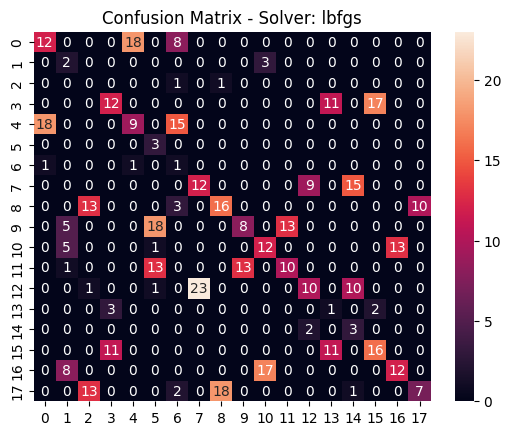

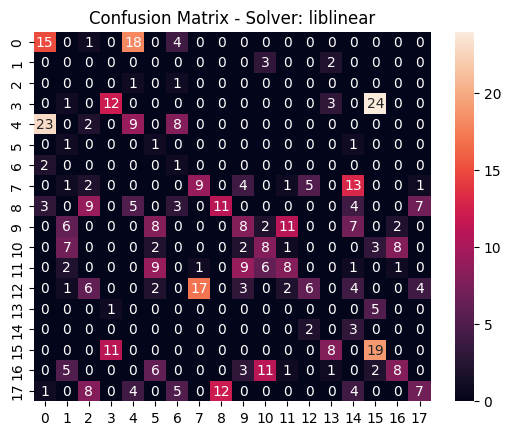

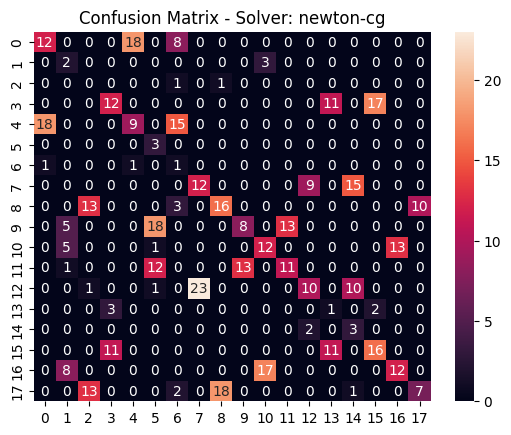

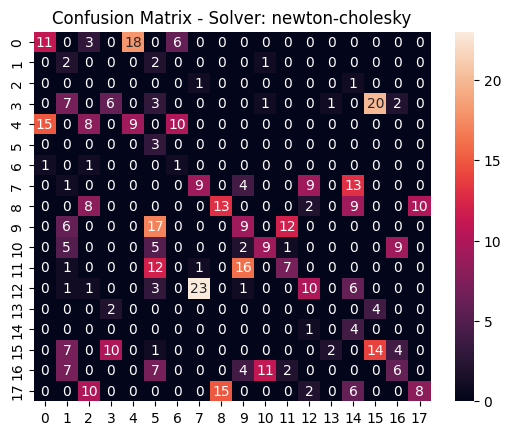

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


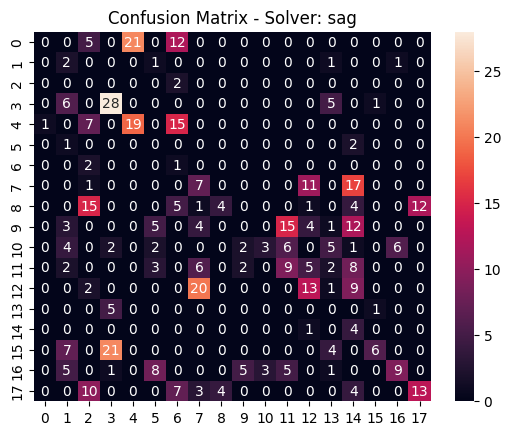

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


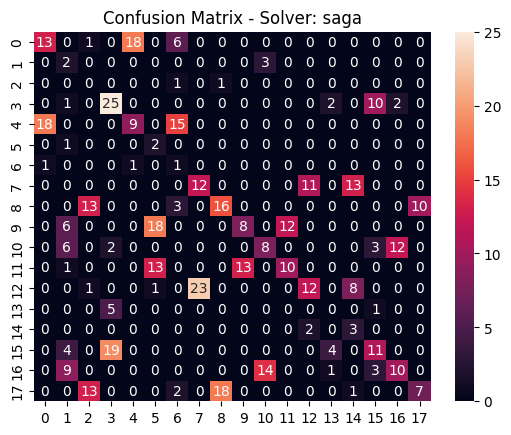

Solver: lbfgs
                precision    recall  f1-score   support

    Alexandria       0.39      0.32      0.35        38
      Auckland       0.10      0.40      0.15         5
       Beijing       0.00      0.00      0.00         2
  Buenos Aires       0.46      0.30      0.36        40
         Cairo       0.32      0.21      0.26        42
       Chicago       0.08      1.00      0.15         3
          Giza       0.03      0.33      0.06         3
      Istanbul       0.34      0.33      0.34        36
         Kyoto       0.46      0.38      0.42        42
   Los Angeles       0.38      0.18      0.25        44
     Melbourne       0.38      0.39      0.38        31
      New York       0.43      0.27      0.33        37
         Paris       0.48      0.22      0.30        45
Rio de Janeiro       0.04      0.17      0.07         6
          Rome       0.10      0.60      0.18         5
     Sao Paulo       0.46      0.42      0.44        38
        Sydney       0.48      0.

In [259]:
X = dataset[['Continent', 'City Type', 'Tourism Type', 'Weather','Accommodation Cost', 'Transportation Cost']].to_numpy()
y = dataset["City"].to_numpy()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Define the solvers
solvers = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

results = {}

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for solver in solvers:
    LR_model = LogisticRegression(solver=solver, class_weight='balanced', max_iter=1000, C=1.0)
    LR_model.fit(X_train_scaled, y_train)
    predictions = LR_model.predict(X_test_scaled)
    predictions_probability = LR_model.predict_proba(X_test_scaled)
    cf_matrix = confusion_matrix(y_test, predictions)

    results[solver] = {
        "classification_report": classification_report(y_test, predictions),
        "confusion_matrix": cf_matrix
    }

    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f")
    plt.title(f"Confusion Matrix - Solver: {solver}")
    plt.show()

# Print classification reports for each solver
for solver, result in results.items():
    print(f"Solver: {solver}")
    print(result["classification_report"])

# GradientBoostingClassifier

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

Accuracy: 0.44646464646464645
Confusion Matrix:
[[20  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 19  0  0  0  0  0  0  0  0  0  0  0 21  0  0]
 [26  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  2  0  0  0  0  0  0]
 [ 2  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0 18  0  0  0  0  0  0  0  0 23]
 [ 0  0  0  0  0  0  0  0  0 20  0 24  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0 16  0 21  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  3  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0

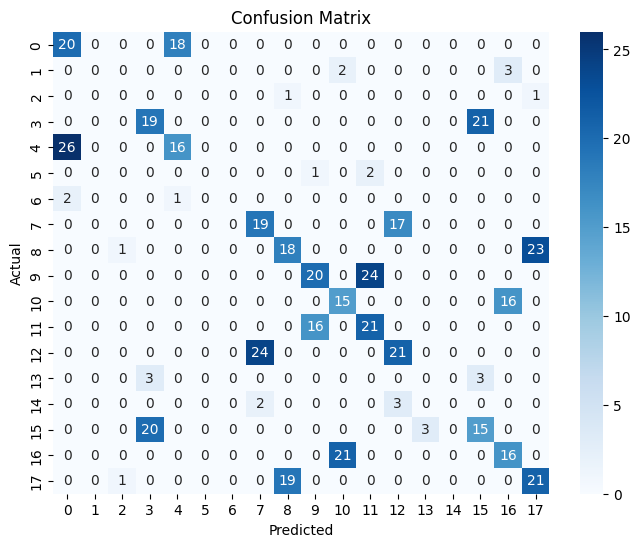

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: 

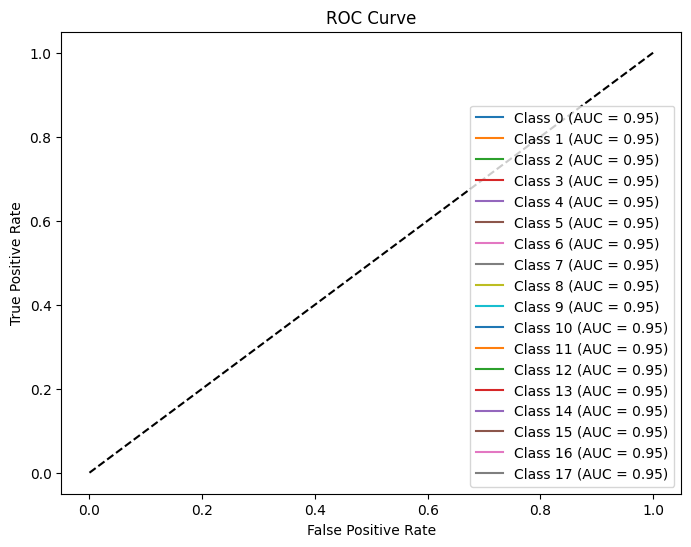

In [260]:
from sklearn.calibration import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# تجهيز البيانات
X = dataset[['Continent', 'City Type', 'Tourism Type', 'Weather','Accommodation Cost', 'Transportation Cost']].to_numpy()
y = dataset["City"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7, shuffle=True)

# تدريب النموذج
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# عمل التوقعات
y_pred = model.predict(X_test)

# حساب مؤشرات الأداء
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

# طباعة النتائج
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)
print(f"ROC AUC Score: {roc_auc:.2f}")

# رسم مصفوفة الارتباك
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# رسم منحنى ROC
y_test_binarized = label_binarize(y_test, classes=np.arange(len(np.unique(y_test))))
fpr = dict()
tpr = dict()

for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], model.predict_proba(X_test)[:, i])

plt.figure(figsize=(8,6))
for i in range(y_test_binarized.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# xgb

In [261]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

X = dataset[['Continent', 'City Type', 'Tourism Type', 'Weather','Accommodation Cost', 'Transportation Cost']].to_numpy()
y = dataset["City"].to_numpy()

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.35, random_state=7, shuffle=True)

# تدريب نموذج XGBoost
xg_model = xgb.XGBClassifier( objective='multi:softmax', num_class=len(label_encoder.classes_))
xg_model.fit(X_train, y_train)

# التنبؤ والتقييم
predictions = xg_model.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")


XGBoost Accuracy: 43.05%


# XGBoost

In [262]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# تدريب نموذج XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# عمل التوقعات
y_pred = model.predict(X_test)

# حساب مؤشرات الأداء
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# طباعة النتائج
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:24:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.43047619047619046
Confusion Matrix:
[[19  0  0  0 21  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0 23  0  0]
 [23  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0 26]
 [ 0  0  0  0  0  1  0  0  0 21  0 23  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  2  0  0  0 20  0 16  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0 17  0  1  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0  0  0  0  2  0 13  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

# LGBMClassifier

In [263]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 527
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 6
[LightGBM] [Info] Start training from score -2.525729
[LightGBM] [Info] Start training from score -5.010635
[LightGBM] [Info] Start training from score -5.010635
[LightGBM] [Info] Start training from score -2.525729
[LightGBM] [Info] Start training from score -2.525729
[LightGBM] [Info] Start training from score -5.010635
[LightGBM] [Info] Start training from score -5.010635
[LightGBM] [Info] Start training from score -2.525729
[LightGBM] [Info] Start training from score -2.525729
[LightGBM] [Info] Start training from score -2.525729
[LightGBM] [Info] Start training from score -2.525729
[LightGBM] [Info] Start training from score -2.525729
[L

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

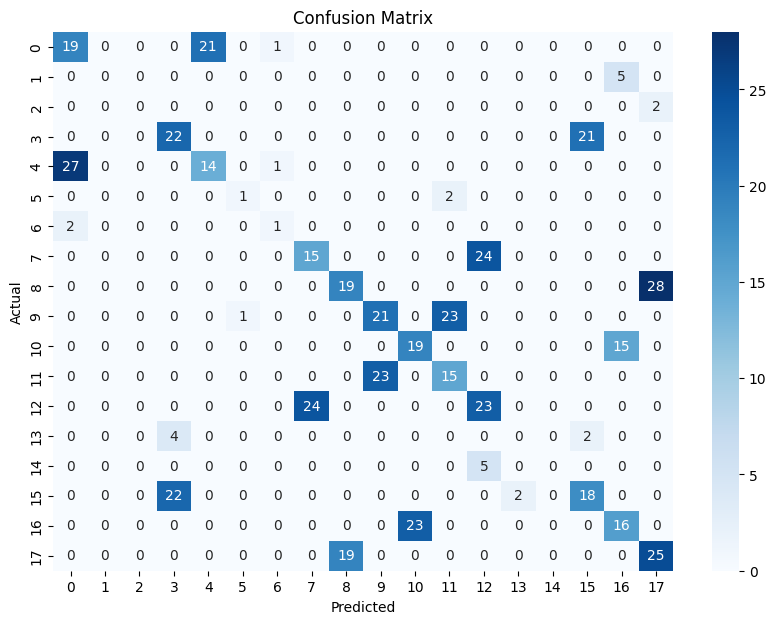

In [264]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# إعداد البيانات
X = dataset[['Continent', 'City Type', 'Tourism Type', 'Weather', 'Accommodation Cost', 'Transportation Cost']].to_numpy()
y = dataset["City"].to_numpy()

# تطبيق التطبيع أو التوحيد
scaler = StandardScaler()  # يمكنك استخدام MinMaxScaler() بدلاً من StandardScaler()
X_scaled = scaler.fit_transform(X)

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=7, shuffle=True)

# إعداد نموذج LightGBM
lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.05, n_estimators=100)

# تطبيق Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
cv_scores = cross_val_score(lgb_model, X_scaled, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Average CV Accuracy: {np.mean(cv_scores) * 100:.2f}%')

# تدريب النموذج النهائي على مجموعة التدريب
lgb_model.fit(X_train, y_train)

# التنبؤ على مجموعة الاختبار
y_pred = lgb_model.predict(X_test)

# قياس الدقة
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy * 100:.2f}%')

# تقرير التصنيف
print(classification_report(y_test, y_pred))

# مصفوفة الارتباك
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# RandomForestClassifier

Accuracy on Test Set: 41.14%
                precision    recall  f1-score   support

    Alexandria       0.40      0.51      0.45        41
      Auckland       0.00      0.00      0.00         5
       Beijing       0.00      0.00      0.00         2
  Buenos Aires       0.36      0.40      0.38        43
         Cairo       0.42      0.33      0.37        42
       Chicago       1.00      0.33      0.50         3
          Giza       0.00      0.00      0.00         3
      Istanbul       0.33      0.41      0.36        39
         Kyoto       0.51      0.47      0.49        47
   Los Angeles       0.49      0.42      0.45        45
     Melbourne       0.46      0.50      0.48        34
      New York       0.39      0.47      0.43        38
         Paris       0.36      0.32      0.34        47
Rio de Janeiro       0.00      0.00      0.00         6
          Rome       0.00      0.00      0.00         5
     Sao Paulo       0.32      0.33      0.33        42
        Sydney    

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

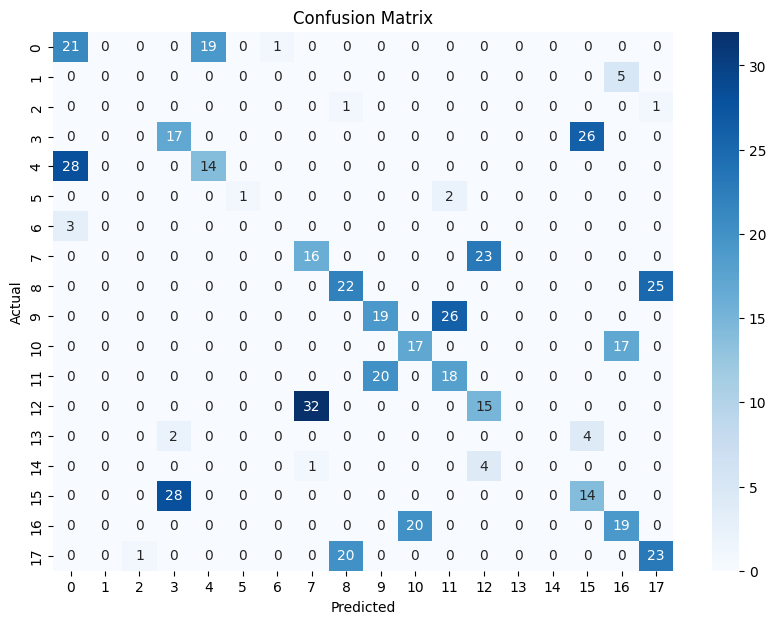

In [265]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# إعداد البيانات
X = dataset[['Continent', 'City Type', 'Tourism Type', 'Weather', 'Accommodation Cost', 'Transportation Cost']].to_numpy()
y = dataset["City"].to_numpy()

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=7, shuffle=True)

# إعداد نموذج RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=7)

# تدريب النموذج النهائي على مجموعة التدريب
rf_model.fit(X_train, y_train)

# التنبؤ على مجموعة الاختبار
y_pred = rf_model.predict(X_test)

# قياس الدقة
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy * 100:.2f}%')

# تقرير التصنيف
print(classification_report(y_test, y_pred))

# مصفوفة الارتباك
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# DecisionTreeClassifier

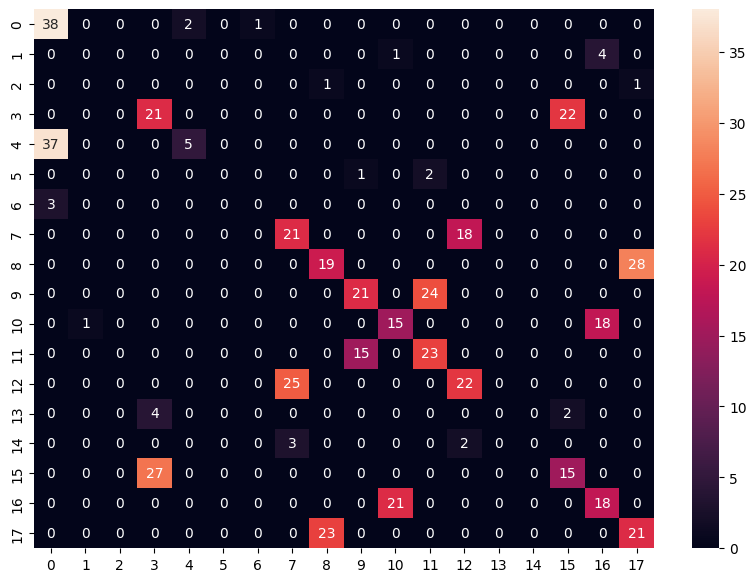

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

gini:
                precision    recall  f1-score   support

    Alexandria       0.49      0.93      0.64        41
      Auckland       0.00      0.00      0.00         5
       Beijing       0.00      0.00      0.00         2
  Buenos Aires       0.40      0.49      0.44        43
         Cairo       0.71      0.12      0.20        42
       Chicago       0.00      0.00      0.00         3
          Giza       0.00      0.00      0.00         3
      Istanbul       0.43      0.54      0.48        39
         Kyoto       0.44      0.40      0.42        47
   Los Angeles       0.57      0.47      0.51        45
     Melbourne       0.41      0.44      0.42        34
      New York       0.47      0.61      0.53        38
         Paris       0.52      0.47      0.49        47
Rio de Janeiro       0.00      0.00      0.00         6
          Rome       0.00      0.00      0.00         5
     Sao Paulo       0.38      0.36      0.37        42
        Sydney       0.45      0.46      

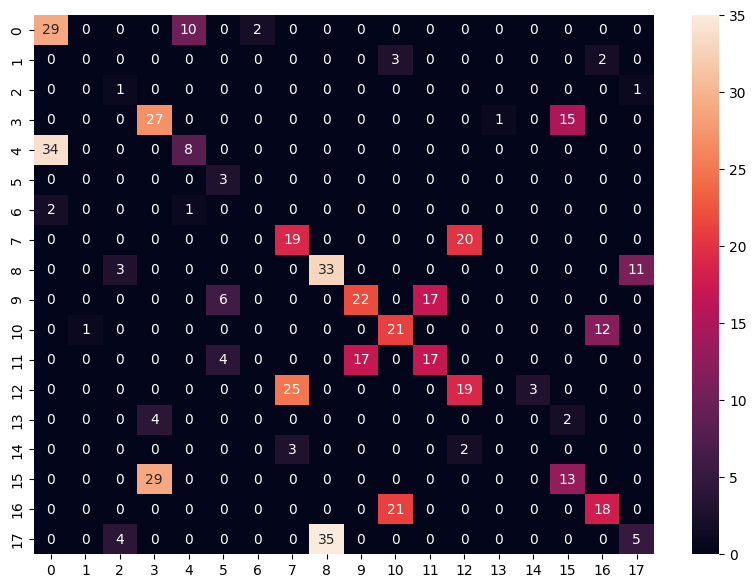

entropy:
                precision    recall  f1-score   support

    Alexandria       0.45      0.71      0.55        41
      Auckland       0.00      0.00      0.00         5
       Beijing       0.12      0.50      0.20         2
  Buenos Aires       0.45      0.63      0.52        43
         Cairo       0.42      0.19      0.26        42
       Chicago       0.23      1.00      0.38         3
          Giza       0.00      0.00      0.00         3
      Istanbul       0.40      0.49      0.44        39
         Kyoto       0.49      0.70      0.57        47
   Los Angeles       0.56      0.49      0.52        45
     Melbourne       0.47      0.62      0.53        34
      New York       0.50      0.45      0.47        38
         Paris       0.46      0.40      0.43        47
Rio de Janeiro       0.00      0.00      0.00         6
          Rome       0.00      0.00      0.00         5
     Sao Paulo       0.43      0.31      0.36        42
        Sydney       0.56      0.46   

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# إعداد البيانات
X = dataset[['Continent', 'City Type', 'Tourism Type', 'Weather', 'Accommodation Cost', 'Transportation Cost']].to_numpy()
y = dataset["City"].to_numpy()

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=10).fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

solver_list = ['gini', 'entropy'] 

for solver in solver_list:
    tree_model = DecisionTreeClassifier(criterion=solver, max_depth=7)
    tree_model.fit(X_train, y_train)
    predictions = tree_model.predict(X_test)
    predictions_probabilty = tree_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    
    plt.figure(figsize=(10,7))
    sns.heatmap(cf_matrix, annot=True, fmt='.0f')
    plt.show()  # Show the heatmap
    
    csr = classification_report(y_test, predictions)
    print(f"{solver}:")
    print(csr)
    print("\n")

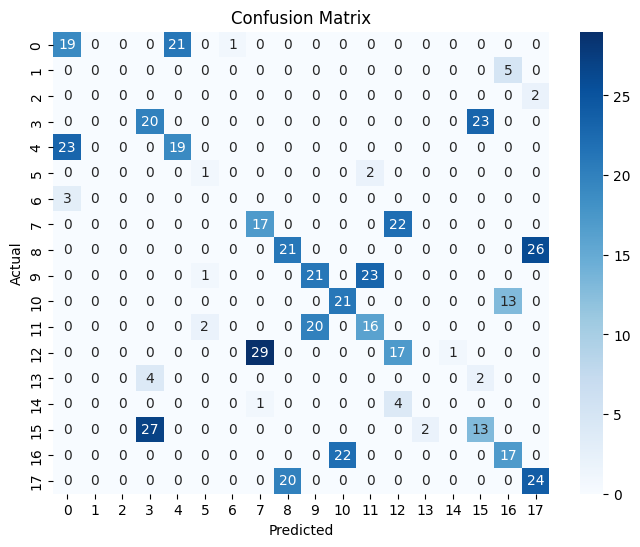

Classification Report:

              precision    recall  f1-score   support

           0       0.42      0.46      0.44        41
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         2
           3       0.39      0.47      0.43        43
           4       0.47      0.45      0.46        42
           5       0.25      0.33      0.29         3
           6       0.00      0.00      0.00         3
           7       0.36      0.44      0.40        39
           8       0.51      0.45      0.48        47
           9       0.51      0.47      0.49        45
          10       0.49      0.62      0.55        34
          11       0.39      0.42      0.41        38
          12       0.40      0.36      0.38        47
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         5
          15       0.34      0.31      0.33        42
          16       0.49      0.44      0.46        39
   

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

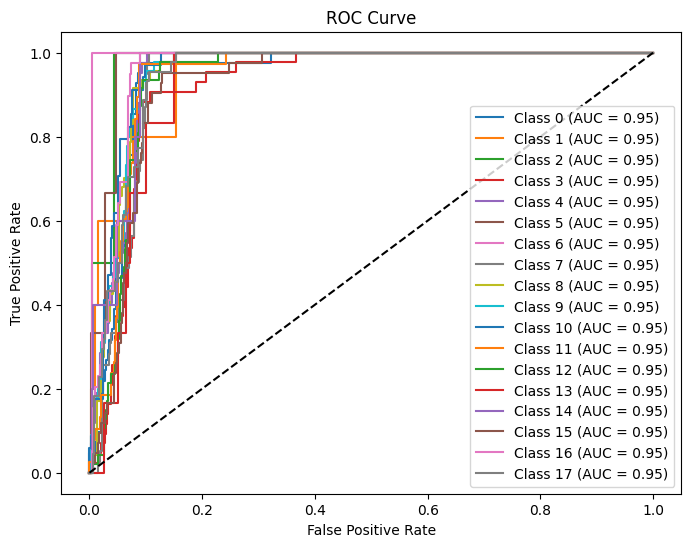

In [267]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test)

# Get predicted class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Encode y_test labels
y_test_encoded = label_encoder.transform(y_test)

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test_encoded, y_pred))

# Assuming y_test contains class labels like [0, 1, 2] for a multi-class problem
num_classes = y_pred_prob.shape[1]

# Binarize y_test for multi-class ROC AUC
y_test_binarized = label_binarize(y_test_encoded, classes=np.arange(num_classes))

# Calculate AUC using 'ovr' for multi-class classification
auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
print(f'AUC: {auc:.2f}')

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(num_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])

plt.figure(figsize=(8,6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# SVM

Accuracy on Test Set: 1.14%
                precision    recall  f1-score   support

    Alexandria       0.00      0.00      0.00        41
      Auckland       0.01      0.20      0.02         5
       Beijing       0.00      0.00      0.00         2
  Buenos Aires       0.00      0.00      0.00        43
         Cairo       0.00      0.00      0.00        42
       Chicago       0.00      0.00      0.00         3
          Giza       0.00      0.00      0.00         3
      Istanbul       0.03      0.03      0.03        39
         Kyoto       0.00      0.00      0.00        47
   Los Angeles       0.00      0.00      0.00        45
     Melbourne       0.00      0.00      0.00        34
      New York       0.04      0.03      0.03        38
         Paris       0.11      0.04      0.06        47
Rio de Janeiro       0.00      0.00      0.00         6
          Rome       0.00      0.00      0.00         5
     Sao Paulo       0.33      0.02      0.04        42
        Sydney     

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

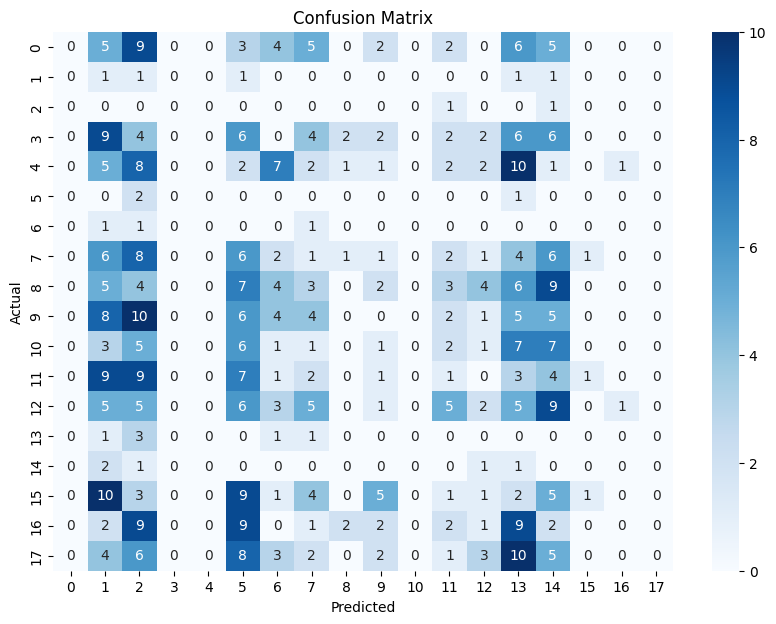

In [268]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

X = dataset[['Continent', 'City Type', 'Tourism Type', 'Weather', 'Accommodation Cost', 'Transportation Cost']].to_numpy()
y = dataset["City"].to_numpy()

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=7, shuffle=True)

# معالجة توازن البيانات باستخدام SMOTE
# Adjust k_neighbors to avoid the ValueError
smote = SMOTE(random_state=7, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# إعداد نموذج SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=7)

# تدريب النموذج
svm_model.fit(X_resampled, y_resampled)

# التنبؤ على مجموعة الاختبار
y_pred = svm_model.predict(X_test)

# قياس الدقة
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy * 100:.2f}%')

# تقرير التصنيف
print(classification_report(y_test, y_pred))

# مصفوفة الارتباك
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# اخر حاجه

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

Cross-Validation Accuracy Scores (Random Forest): [0.42333333 0.40666667 0.42333333 0.42       0.37333333]
Average CV Accuracy (Random Forest): 40.93%
Accuracy on Test Set (Random Forest): 41.33%

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.44      0.56      0.49        41
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         2
           3       0.35      0.40      0.37        43
           4       0.45      0.36      0.40        42
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         3
           7       0.36      0.49      0.41        39
           8       0.49      0.45      0.47        47
           9       0.49      0.42      0.45        45
          10       0.44      0.47      0.46        34
          11       0.39      0.47      0.43        38
          12       0.37      0.30      0.33        47
      

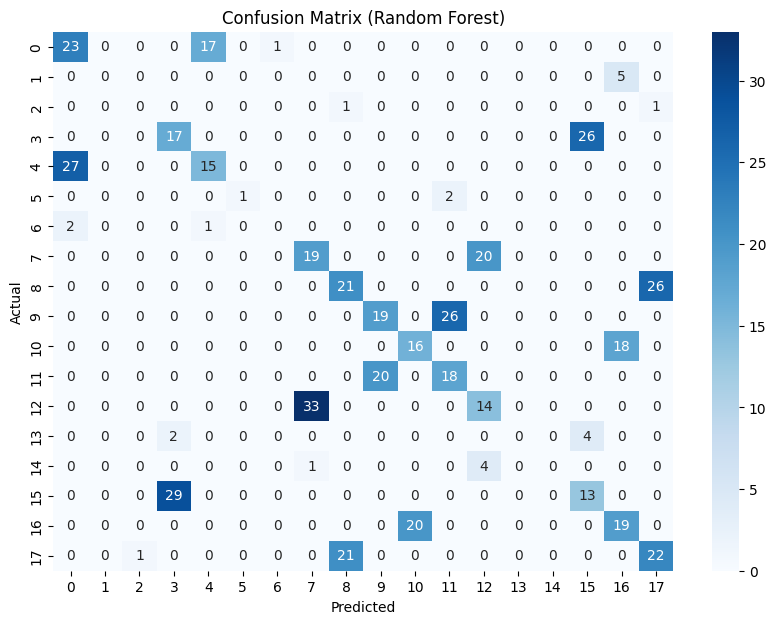

In [269]:
# Re-import necessary libraries and redefine preprocessing steps
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Re-read the dataset

# Label encoding for categorical columns
categorical_columns = ['City', 'Continent', 'City Type', 'Tourism Type', 'Weather']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

# Define features and target
X = dataset[['Continent', 'City Type', 'Tourism Type', 'Weather', 'Accommodation Cost', 'Transportation Cost']].to_numpy()
y = dataset["City"].to_numpy()

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=7, shuffle=True)

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=7)

# Perform Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
cv_rf_scores = cross_val_score(rf_model, X_scaled, y, cv=cv, scoring='accuracy')

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, y_rf_pred)

# Classification Report and Confusion Matrix
rf_classification_rep = classification_report(y_test, y_rf_pred)
rf_cf_matrix = confusion_matrix(y_test, y_rf_pred)

# Display results
print(f'Cross-Validation Accuracy Scores (Random Forest): {cv_rf_scores}')
print(f'Average CV Accuracy (Random Forest): {np.mean(cv_rf_scores) * 100:.2f}%')
print(f'Accuracy on Test Set (Random Forest): {rf_accuracy * 100:.2f}%')
print("\nClassification Report (Random Forest):\n", rf_classification_rep)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(rf_cf_matrix, annot=True, fmt='.0f', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [270]:
from joblib import dump
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split



# Define features and target
X = dataset[['Continent', 'City Type', 'Tourism Type', 'Weather', 'Accommodation Cost', 'Transportation Cost']].values
y = dataset["City"].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=7, shuffle=True)

# Train the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=7)
rf_model.fit(X_train, y_train)

# Save the model, scaler, and label encoders to separate files
dump(rf_model, 'random_forest_model.pkl')
dump(scaler, 'scaler.pkl')
dump(label_encoders, 'label_encoders.pkl')

print("Model, scaler, and encoders saved in separate files.")


Model, scaler, and encoders saved in separate files.


In [271]:
# Display mappings for each categorical column
for column, encoder in label_encoders.items():
    print(f"Mapping for {column}:")
    mapping = {index: label for index, label in enumerate(encoder.classes_)}
    for key, value in mapping.items():
        print(f"  {key}: {value}")
    print()


Mapping for City:
  0: Alexandria
  1: Auckland
  2: Beijing
  3: Buenos Aires
  4: Cairo
  5: Chicago
  6: Giza
  7: Istanbul
  8: Kyoto
  9: Los Angeles
  10: Melbourne
  11: New York
  12: Paris
  13: Rio de Janeiro
  14: Rome
  15: Sao Paulo
  16: Sydney
  17: Tokyo

Mapping for Continent:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5

Mapping for City Type:
  0: 0
  1: 1
  2: 2
  3: 3

Mapping for Tourism Type:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4

Mapping for Weather:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5



In [272]:
# Assuming you have already loaded the label_encoders for 'City'
city_encoder = label_encoders['City']

# Get all unique city labels
cities = city_encoder.classes_

# Create a dictionary mapping city name to its numeric value
city_to_numeric = {city: idx for idx, city in enumerate(cities)}

# Print each city with its numeric value
for city, numeric_value in city_to_numeric.items():
    print(f"City: {city}, Numeric Value: {numeric_value}")


City: Alexandria, Numeric Value: 0
City: Auckland, Numeric Value: 1
City: Beijing, Numeric Value: 2
City: Buenos Aires, Numeric Value: 3
City: Cairo, Numeric Value: 4
City: Chicago, Numeric Value: 5
City: Giza, Numeric Value: 6
City: Istanbul, Numeric Value: 7
City: Kyoto, Numeric Value: 8
City: Los Angeles, Numeric Value: 9
City: Melbourne, Numeric Value: 10
City: New York, Numeric Value: 11
City: Paris, Numeric Value: 12
City: Rio de Janeiro, Numeric Value: 13
City: Rome, Numeric Value: 14
City: Sao Paulo, Numeric Value: 15
City: Sydney, Numeric Value: 16
City: Tokyo, Numeric Value: 17
